In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import Model, layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

2023-06-20 15:12:30.009718: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-06-20 15:12:30.011821: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-20 15:12:30.053232: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-20 15:12:30.054047: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-20 15:12:30.738104: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [2]:
(x_trainval, y_trainval), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print(x_trainval.shape)
print(y_trainval.shape)

x_train, x_valid, y_train, y_valid = train_test_split(x_trainval, y_trainval, test_size = 1/6, shuffle = True, stratify = y_trainval)

print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)
(50000, 28, 28)
(50000,)


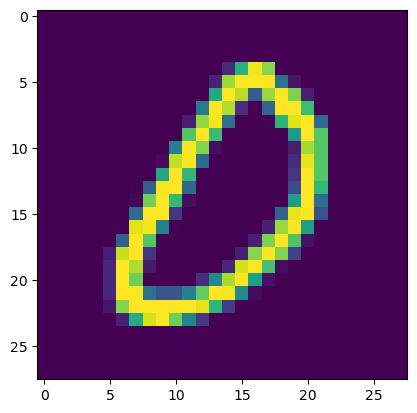

In [3]:
plt.imshow(x_train[0])

In [4]:
x_train, x_valid, x_test = x_train.astype('float32')/255, x_valid.astype('float32')/255, x_test.astype('float32')/255

x_train = x_train.reshape(-1, 28, 28, 1)
x_valid = x_valid.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [5]:
class CNN(Model):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = layers.Conv2D(32, 3, strides = 1, padding = 'same', activation = 'relu', input_shape = (28,28,1))
        self.maxpool1 = layers.MaxPool2D(3, strides = 2, padding = 'same')
        self.conv2 = layers.Conv2D(64, 3, strides = 1, padding = 'same', activation = 'relu')
        self.maxpool2 = layers.MaxPool2D(3, strides = 2, padding = 'same')
        self.flatten = layers.Flatten()
        self.fc1 = layers.Dense(128, activation = 'relu')
        self.fc2 = layers.Dense(10, activation = 'softmax')
        
    def call(self, x):
        x = self.conv1(x)
        x = self.maxpool1(x)
        x = self.conv2(x)
        x = self.maxpool2(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.fc2(x)
        
        return x

In [10]:
data = [x_train, y_train, x_valid, y_valid, x_test, y_test]

def train(model, x_train, y_train, x_valid, y_valid, x_test, y_test, epoch = 10, lr = 0.1):
    model.compile(loss = 'sparse_categorical_crossentropy', optimizer = tf.keras.optimizers.SGD(learning_rate = lr), metrics = ['accuracy'])
    result = model.fit(x_train, y_train, epochs = epoch, batch_size = 128, validation_data = (x_valid, y_valid))
    test_result = cnn.evaluate(x_test, y_test)
    
    plt.plot(result.history['accuracy'])
    plt.plot(result.history['val_accuracy'])
    plt.title("CNN ACCURACY")
    plt.grid()
    plt.legend(['train', 'validation'], loc = 'best')

Epoch 1/10
391/391 [==============================] - 11s 28ms/step - loss: 0.3857 - accuracy: 0.8788 - val_loss: 0.1127 - val_accuracy: 0.9657
Epoch 2/10
391/391 [==============================] - 11s 28ms/step - loss: 0.0844 - accuracy: 0.9732 - val_loss: 0.0582 - val_accuracy: 0.9829
Epoch 3/10
391/391 [==============================] - 11s 28ms/step - loss: 0.0613 - accuracy: 0.9807 - val_loss: 0.0516 - val_accuracy: 0.9834
Epoch 4/10
391/391 [==============================] - 11s 28ms/step - loss: 0.0470 - accuracy: 0.9853 - val_loss: 0.0727 - val_accuracy: 0.9757
Epoch 5/10
391/391 [==============================] - 11s 28ms/step - loss: 0.0396 - accuracy: 0.9875 - val_loss: 0.0348 - val_accuracy: 0.9892
Epoch 6/10
391/391 [==============================] - 11s 28ms/step - loss: 0.0335 - accuracy: 0.9895 - val_loss: 0.0327 - val_accuracy: 0.9897
Epoch 7/10
391/391 [==============================] - 11s 28ms/step - loss: 0.0302 - accuracy: 0.9904 - val_loss: 0.0287 - val_accuracy:

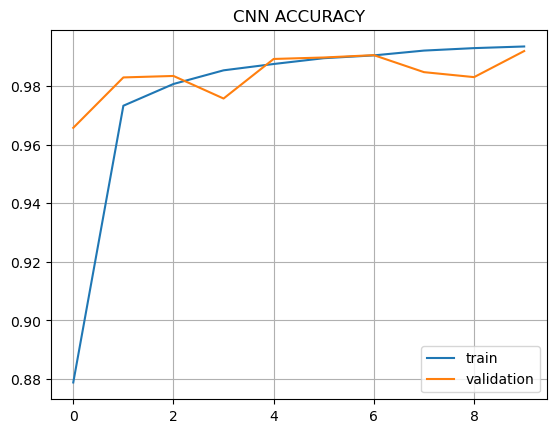

In [11]:
cnn = CNN()
train(cnn, *data)